In [10]:
import cv2
import numpy as np
from tqdm import tqdm
from scipy import optimize

import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import match_histograms

In [11]:
def get_coords(imgSrc, imgTar, block_size = 5):
    B = block_size
    if len(imgTar.shape) == 2:
        rows, cols = imgTar.shape
        ch = 1
    else:
        rows, cols, ch = imgTar.shape
    
    B = 5  # Block size
    r = rows // B
    c = cols // B
            
    cost_matrix = np.empty((r,c,r,c,ch))

    srcAvg = np.empty((r,c,ch))
    tarAvg = np.empty((r,c,ch))

    for i in tqdm(range(r)):
        for j in range(c):
            srcAvg[i,j] = np.average(imgSrc[i*B:i*B+B, j*B:j*B+B], axis=(0,1))
            tarAvg[i,j] = np.average(imgTar[i*B:i*B+B, j*B:j*B+B], axis=(0,1))

    for i in tqdm(range(r)):
            for j in range(c):
                cost_matrix[i,j] = tarAvg[i,j] -  srcAvg

    cost_matrix = np.linalg.norm(cost_matrix, axis=-1)


    temp = cost_matrix.reshape(r, c, r*c).transpose(2,0,1).reshape(r*c, r*c).transpose(1,0)
    _, col_ind = optimize.linear_sum_assignment(temp)
    
    return col_ind.reshape(r,c)

def suffle_pixel(imgSrc, imgTar, coords, block_size = 5):
    B = block_size
    if len(imgTar.shape) == 2:
        rows, cols = imgTar.shape
        ch = 1
        final_arr = np.full((rows, cols), 255, dtype=int)
    else:
        rows, cols, ch = imgTar.shape
        final_arr = np.full((rows, cols, ch), 255, dtype=int)
    r = rows // B
    c = cols // B

    for i in range(r):
        for j in range(c):
            temp = coords[i,j]
            i2 = temp // c
            j2 = temp % c
            
            final_arr[i*B:i*B+B, j*B:j*B+B] = imgSrc[i2*B:i2*B+B, j2*B:j2*B+B].copy()
    return final_arr


In [12]:
def get_error(img1, img2):
    if len(img1.shape) == 2:
        return np.mean(np.sqrt((img1 - img2)**2))
    if len(img1.shape) == 3:
        return np.mean(np.linalg.norm(img1 - img2, axis=-1))

def plot_hist_cdf(image):
    histogram, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = histogram.cumsum() / histogram.sum()

    # Plot histogram and CDF
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(image.flatten(), 256, [0, 256], color='r')
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.plot(cdf, color='b')
    plt.title('CDF')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Cumulative Probability')
    
    plt.subplot(1, 3, 3)
    plt.imshow(image, cmap="gray")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [13]:
img1_gray = cv2.imread("pics/tree1.png", cv2.IMREAD_GRAYSCALE)
img2_gray = cv2.imread("pics/tree2.png", cv2.IMREAD_GRAYSCALE)

img1 = cv2.cvtColor(cv2.imread("pics/tree1.png"), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread("pics/tree2.png"), cv2.COLOR_BGR2RGB)

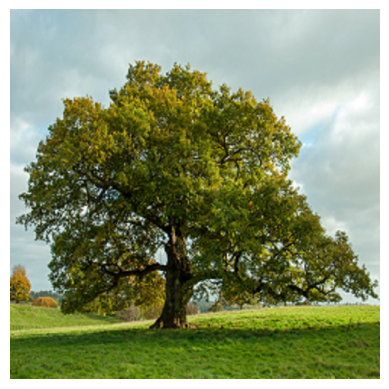

In [14]:
plt.imshow(img1)
plt.axis("off")
plt.show()

100%|██████████| 100/100 [00:02<00:00, 39.00it/s]


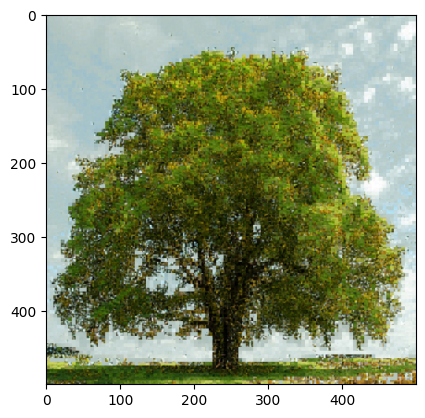

In [16]:
coords = get_coords(img1, img2, 5)
newImage = suffle_pixel(img1, img2, coords, 5)
plt.imshow(newImage, cmap="gray")
plt.show()

# histogram matching


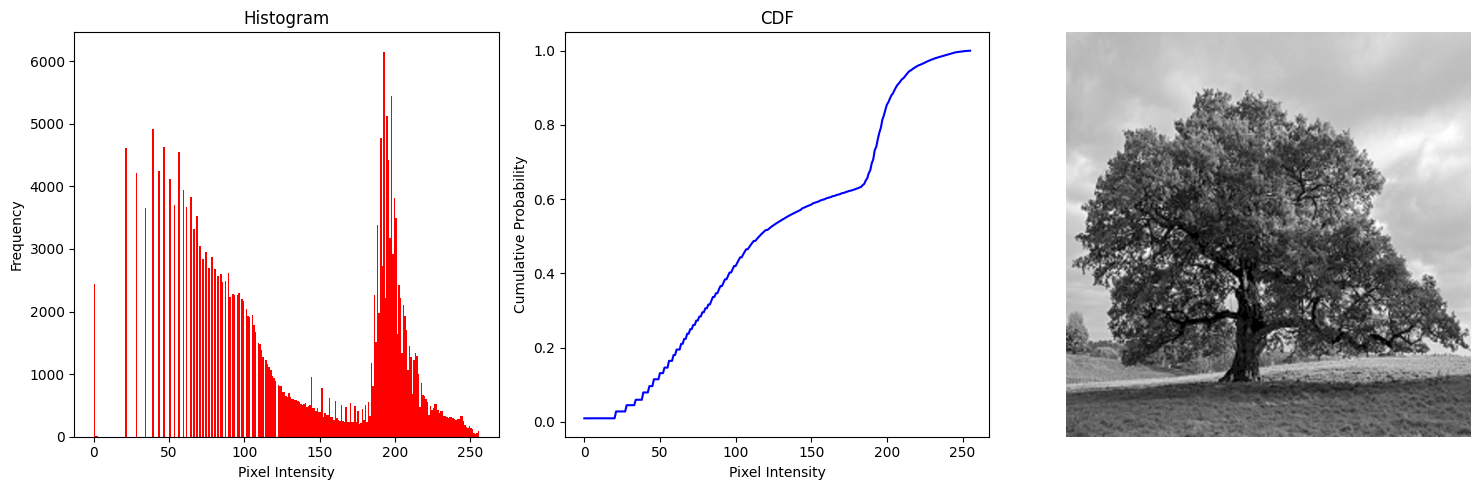

In [139]:
plot_hist_cdf(img1_gray)

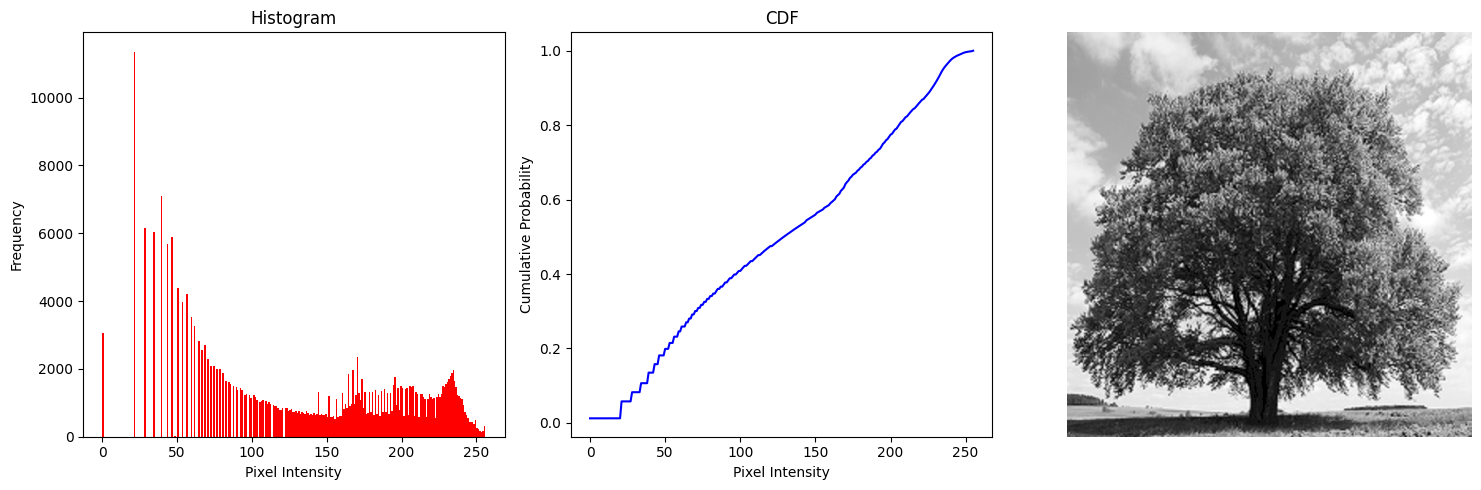

In [140]:
plot_hist_cdf(img2_gray)

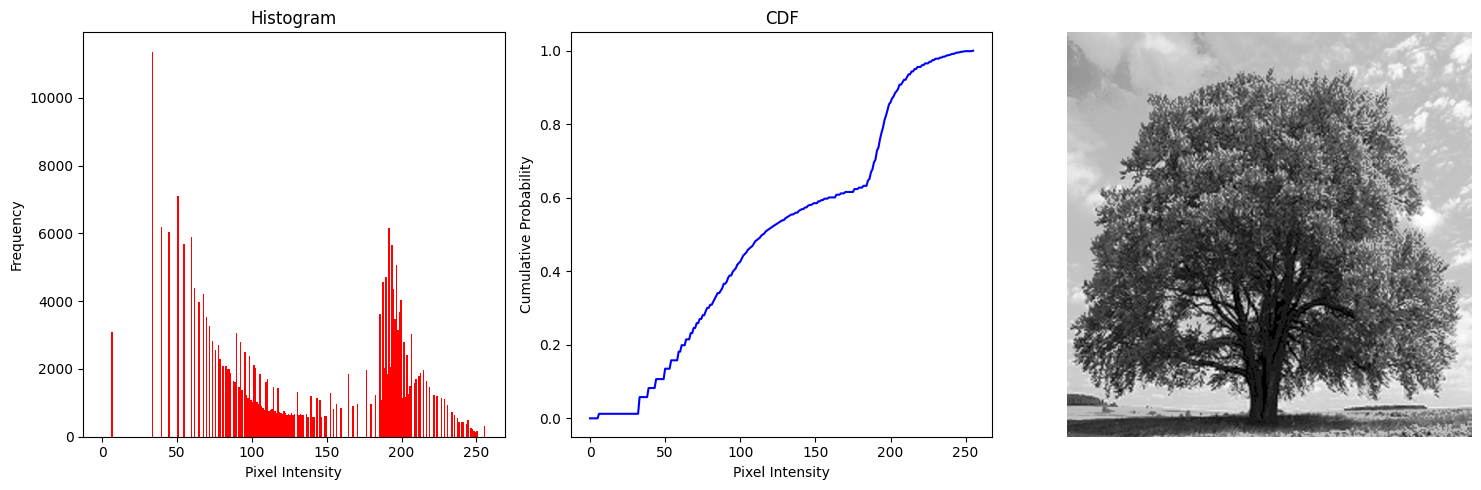

In [15]:
plot_hist_cdf(match_histograms(img2_gray, img1_gray))

# Colorize

100%|██████████| 100/100 [00:00<00:00, 411.86it/s]


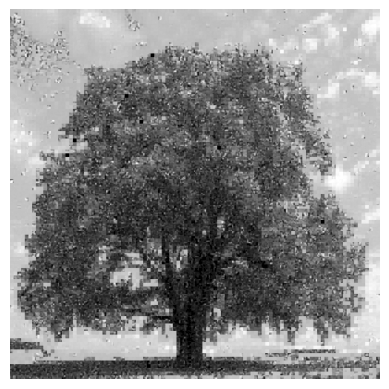

MRE is : 24.5426


In [17]:
coords = get_coords(img1_gray, match_histograms(img2_gray, img1_gray), 5)
newImage = suffle_pixel(img1_gray, img2_gray, coords, 5)
plt.imshow(newImage, cmap="gray")
plt.axis("off")
plt.show()

print(f"MRE is : {get_error(newImage, img2_gray)}")

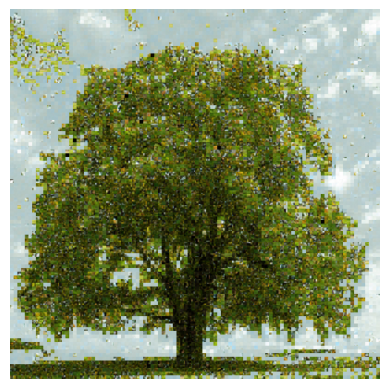

MRE is : 59.57545792069746


In [18]:
newImage = suffle_pixel(img1, img2, coords, 5)
plt.imshow(newImage, cmap="gray")
plt.axis("off")
plt.show()

print(f"MRE is : {get_error(newImage, img2)}")

In [25]:
newImage = newImage.astype('uint8')

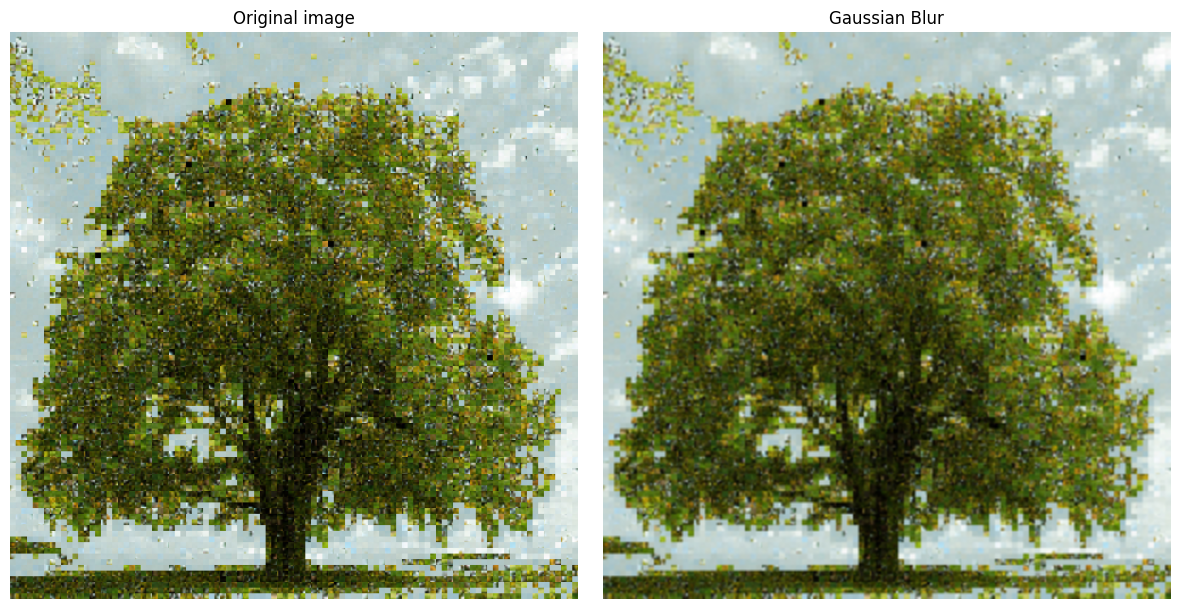

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(newImage)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Gaussian Blur")
plt.imshow(cv2.GaussianBlur(newImage, (3,3), 0))
plt.axis("off")

plt.tight_layout()
plt.show()

# Without limitation


In [85]:
def get_coords_2(imgSrc, imgTar, block_size = 5):
    B = block_size
    if len(imgTar.shape) == 2:
        rows, cols = imgTar.shape
        ch = 1
    else:
        rows, cols, ch = imgTar.shape
    
    B = 5  # Block size
    r = rows // B
    c = cols // B
            
    cost_matrix = np.empty((r,c,r,c,ch))

    srcAvg = np.empty((r,c,ch))
    tarAvg = np.empty((r,c,ch))

    for i in tqdm(range(r)):
        for j in range(c):
            srcAvg[i,j] = np.average(imgSrc[i*B:i*B+B, j*B:j*B+B], axis=(0,1))
            tarAvg[i,j] = np.average(imgTar[i*B:i*B+B, j*B:j*B+B], axis=(0,1))

    for i in tqdm(range(r)):
            for j in range(c):
                cost_matrix[i,j] = tarAvg[i,j] -  srcAvg

    cost_matrix = np.linalg.norm(cost_matrix, axis=-1)


    temp = cost_matrix.reshape(r, c, r*c).transpose(2,0,1).reshape(r*c, r*c).transpose(1,0)
    return np.argmin(temp - np.min(temp, axis=1).reshape(-1,1), axis=1).reshape(r,c)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:01<00:00, 79.12it/s]


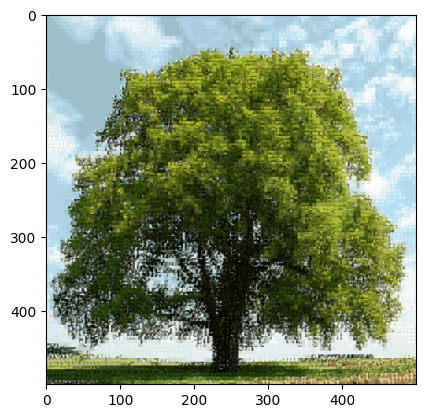

MRE is : 42.74327165901641


In [87]:
coords = get_coords_2(img1, img2, 5)
newImage = suffle_pixel(img1, img2, coords, 5)
plt.imshow(newImage, cmap="gray")
plt.show()

print(f"MRE is : {get_error(newImage, img2)}")

100%|██████████| 100/100 [00:00<00:00, 439.38it/s]


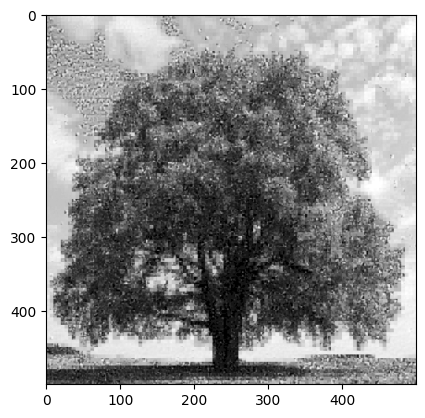

MRE is : 21.66886


In [88]:
coords = get_coords_2(img1_gray, img2_gray, 5)
newImage = suffle_pixel(img1_gray, img2_gray, coords, 5)
plt.imshow(newImage, cmap="gray")
plt.show()

print(f"MRE is : {get_error(newImage, img2_gray)}")

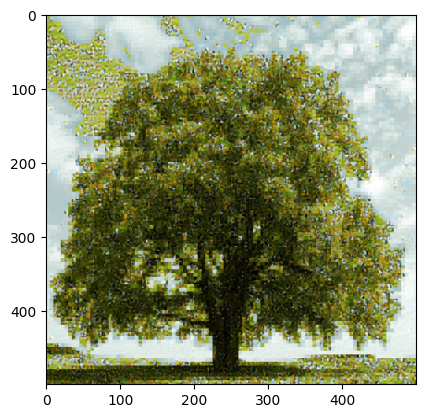

MRE is : 57.335957096939595


In [89]:
newImage = suffle_pixel(img1, img2, coords, 5)
plt.imshow(newImage, cmap="gray")
plt.show()

print(f"MRE is : {get_error(newImage, img2)}")